In [1]:
import os
import argparse
from pycocotools.coco import COCO
import cv2
import matplotlib.pyplot as plt

In [2]:
parser = argparse.ArgumentParser(description="coco")
parser.add_argument("--data_path", default="/data/dataset/v-coco/coco/", type=str)
args = parser.parse_args([])

In [39]:
def to_tsv(mode='train'):
    json_path = os.path.join(args.data_path, 'annotations', f'instances_{mode}2014.json')
    img_path = os.path.join(args.data_path, 'images', f'{mode}2014')
    
    coco = COCO(annotation_file=json_path)
    ids = list(sorted(coco.imgs.keys()))
    
    for img_id in ids:
        imgs = coco.loadImgs(img_id)[0]
        ann_ids = coco.getAnnIds(img_id)
        targets = coco.loadAnns(ann_ids)
        
        image_name = imgs['file_name']
        image_path = os.path.join(img_path, image_name)
        image = cv2.imread(image_path)
        
        for target in targets:
            cat_id = target['category_id']
            cat_name = coco.cats[cat_id]['name']
            x, y, w, h = target['bbox']
            x1, y1, x2, y2 = int(x), int(y), int(x + w), int(y + h)
            cv2.putText(
                image, cat_name, (x1+2, y1+20), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, thickness=2, color=(0, 255, 0)
            )
            cv2.rectangle(
                image, (x1, y1), (x2, y2), (0, 255, 0), 3
            )
        
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image)
        plt.axis('off')
        plt.title(image_name)
        plt.show()
        break

loading annotations into memory...
Done (t=6.15s)
creating index...
index created!


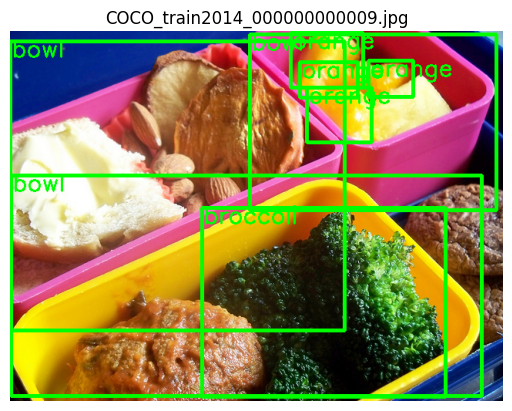

In [40]:
to_tsv('train')